In [1]:
import pandas as pd

In [24]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

In [25]:
train =pd.read_csv("C:/Users/Lenovo/Desktop/data/bigdatamart_rep-master/bigdatamart_Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [27]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [30]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
train.Item_Visibility.value_counts().head()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
Name: Item_Visibility, dtype: int64

In [32]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [34]:
dic = {'Grocery Store':'Small'}
s = train.Outlet_Type.map(dic)
train.Outlet_Size= train.Outlet_Size.combine_first(s)
train.Outlet_Size.value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [35]:
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
dic = {"Tier 2":"Small"}
s = train.Outlet_Location_Type.map(dic)
train.Outlet_Size = train.Outlet_Size.combine_first(s)
train.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
train.Item_Identifier.value_counts().sum()

8523

In [38]:
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [39]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [40]:
item_type_list = train.Item_Type.unique().tolist()

In [41]:
Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean()

In [42]:
for i in item_type_list:
    dic = {i:Item_Type_Means[i]}
    s = train.Item_Type.map(dic)
    train.Item_Weight = train.Item_Weight.combine_first(s)
    
Item_Type_Means = train.groupby('Item_Type')['Item_Weight'].mean() 

In [43]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [44]:
train.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

In [45]:
train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [46]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [48]:
train.Item_Fat_Content.replace(to_replace=["LF","low fat"],value="Low Fat",inplace=True)
train.Item_Fat_Content.replace(to_replace="reg",value="Regular",inplace=True)
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [49]:
train['Outlet_Year'] = (2013 - train.Outlet_Establishment_Year)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [50]:
var_cat = train.select_dtypes(include=[object])
var_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [51]:
var_cat = var_cat.columns.tolist()
var_cat = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [52]:
var_cat=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [56]:
train.Item_Type.replace(to_replace="^FD*.*",value="Food",regex=True,inplace=True)
train.Item_Type.replace(to_replace="^DR*.*",value="Drinks",regex=True,inplace=True)
train.Item_Type.replace(to_replace="^NC*.*",value="Non-Consumable",regex=True,inplace=True)

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet
0,FDA15,9.30,Low Fat,0.016047,Drinks,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,9
3,FDX07,19.20,Regular,0.022911,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,0
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,1


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Outlet'] = le.fit_transform(train.Outlet_Identifier)
train['Item'] = le.fit_transform(train.Item_Type)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet,Item
0,FDA15,9.30,Low Fat,0.016047,Drinks,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,9,4
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,3,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,9,9
3,FDX07,19.20,Regular,0.022911,Food,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,0,5
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,1,8


In [59]:
for i in var_cat:
    train[i] = le.fit_transform(train[i])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet,Item
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,14,9,4
1,DRC01,5.92,1,0.019278,13,48.2692,OUT018,2009,1,2,2,443.4228,4,3,13
2,FDN15,17.50,0,0.016760,9,141.6180,OUT049,1999,1,0,1,2097.2700,14,9,9
3,FDX07,19.20,1,0.022911,5,182.0950,OUT010,1998,2,2,0,732.3800,15,0,5
4,NCD19,8.93,0,0.016164,8,53.8614,OUT013,1987,0,2,1,994.7052,26,1,8


In [60]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Year','Outlet','Item','Item_Weight']

seed = 240
np.random.seed(seed)
X = train[predictors]
y = train.Item_Outlet_Sales
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight
0,0,0.016047,4,249.8092,1,0,1,14,9,4,9.30
1,1,0.019278,13,48.2692,1,2,2,4,3,13,5.92
2,0,0.016760,9,141.6180,1,0,1,14,9,9,17.50
3,1,0.022911,5,182.0950,2,2,0,15,0,5,19.20
4,0,0.016164,8,53.8614,0,2,1,26,1,8,8.93


In [61]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
X_train.shape

(6392, 11)

In [63]:
X_train.tail()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight
5734,1,0.286345,5,139.1838,2,2,0,15,0,5,9.395
5191,0,0.117575,5,75.6670,2,1,1,6,2,5,15.600
5390,0,0.018944,7,237.3590,2,1,1,11,7,7,17.600
860,0,0.054363,12,117.9466,2,1,1,6,2,12,20.350
7270,0,0.016993,8,95.7410,2,0,1,16,8,8,16.350


In [64]:
X_test.shape

(2131, 11)

In [65]:
y_train.shape

(6392,)

In [66]:
y_test.shape

(2131,)

In [68]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

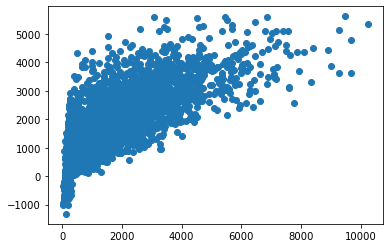

In [72]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.show()

In [73]:
print("Linear Regression Model Score:",model.score(X_test,y_test))

Linear Regression Model Score: 0.5053351426040447


In [74]:
original_values = y_test

In [83]:
import sklearn.metrics as metrics

In [84]:
rmse = np.sqrt(metrics.mean_squared_error(original_values,predictions))
print("Linear Regression RMSE: ", rmse)

Linear Regression RMSE:  1168.2333271361326


In [86]:
import statsmodels.api as sm
x = sm.add_constant(X_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     643.4
Date:                Thu, 12 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:53:48   Log-Likelihood:                -54463.
No. Observations:                6392   AIC:                         1.089e+05
Df Residuals:                    6381   BIC:                         1.090e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -832.4501    125.691     -6.623      0.000   -1078.846    -586.054
Item_Fat_Content        79.7126     32.110      2.482      0.013      16.766     142.659
Item_Visibility      -1585.6037    314.066     -5.049      0.000   -2201.278    -969.929
Item_Type               -0.1556      2.003     -0.078      0.938      -4.082       3.771
Item_MRP                15.6352      0.243     64.363      0.000      15.159      16.111
Outlet_Size           -151.8754     29.165     -5.207      0.000    -209.049     -94.702
Outlet_Location_Type   -96.8254     43.701     -2.216      0.027    -182.494     -11.156
Outlet_Type            819.6823     31.054     26.395      0.000     758.806     880.559
Outlet_Year             -0.2187      2.052     -0.107      0.915      -4.242       3.805
Outlet                  59.5141     10.904      5.458      0.000      38.140      80.889
Item                    -0.1556      2.003     -0.078      0.938      -4.082       3.771
Item_Weight             -2.4865      3.284     -0.757      0.449      -8.923       3.950
==============================================================================
Omnibus:                      589.614   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.771
Skew:                           0.608   Prob(JB):                    8.86e-258
Kurtosis:                       4.722   Cond. No.                     1.11e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.26e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [87]:
predictions = results.predict(x)
predictionsDF = pd.DataFrame({"Predictions":predictions})
joined = x.join(predictionsDF)
joined.head()

,const,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item,Item_Weight,Predictions
4776,1.0,0,0.029565,8,256.4646,1,2,2,4,3,8,16.350,4558.901020
7510,1.0,1,0.065917,12,179.7660,1,2,2,4,3,12,15.250,3383.269396
5828,1.0,1,0.158716,9,157.2946,1,0,1,14,9,9,12.350,2621.793379
5327,1.0,0,0.014628,0,82.3250,2,1,1,9,6,0,7.975,1185.913068
4810,1.0,0,0.016645,5,120.9098,2,1,1,11,7,5,19.350,1815.232074


In [88]:
score = cross_val_score(model,X,y,cv=5)
print("Linear Regression CV Score: ",score)

Linear Regression CV Score:  [0.51826976 0.50307557 0.48252597 0.50325154 0.50006611]


In [90]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [91]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

In [92]:
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [99]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
predictions = regressor.predict(X_test)
predictions[:5]
dir([ 792.302 ,  356.8688,  365.5242, 5778.4782, 2356.932 ])
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,856.8846
2957,356.8688,894.8352
7031,377.5086,282.2992
1084,5778.4782,3691.1952
856,2356.9320,2182.4924


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rf = RandomForestRegressor(random_state=43)
rf.fit(X_train,y_train)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=43, verbose=0, warm_start=False)
predictions = rf.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,804.146582
2957,356.8688,899.908596
7031,377.5086,771.236088
1084,5778.4782,5119.782286
856,2356.9320,2457.534380
